In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy
from scipy import stats

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_json("../input/russian_ads.json")

# 1. Exploratory Data Analysis (Ross)
See Week 3 -> Lab 2

In [3]:
df.head(5)

,language_categories,placement_categories,interests_categories,location_categories,ad_id,ad_copy,ad_landing_page,ad_targeting_location,age_lower,age_upper,age,placements,ad_impressions,ad_clicks,ad_spend_rub,ad_creation_date,month,year,day,ad_end_date,extra_data,pdf_filepath,image_filepath,interest_expansion,excluded_connections,language,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,interests_categories_regex,location_categories_regex,date_order_index
0,[Not Specified],[Facebook],[],"[Midwest, Atlantic]",331.0,"""Free Figure's Black Power Rally at VCU:""",https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland: Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,764.0,43,90.86,06/15/2015,[06],[2015],15,06/16/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002117.pdf,missing_ad.png,None,None,None,1.66,460.24,25.90,0.06,,Midwest_Atlantic,41
1,[Not Specified],[Facebook],[],"[Midwest, Atlantic]",332.0,A woman pretended Afro-American to gain contro...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,676.0,47,89.51,06/15/2015,[06],[2015],15,06/16/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002118.pdf,missing_ad.png,None,None,None,1.63,414.72,28.83,0.07,,Midwest_Atlantic,42
2,[Not Specified],[Facebook],[],"[Midwest, Atlantic]",333.0,2Pac believed in FightTupac Shakur was indeed ...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,1075.0,47,174.40,06/16/2015,[06],[2015],16,06/17/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002119.pdf,missing_ad.png,None,None,None,3.21,334.89,14.64,0.04,,Midwest_Atlantic,43
3,[Not Specified],[Facebook],[African American],"[Midwest, Atlantic]",334.0,Today we celebrate the legendary rapper who ev...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland: Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,153.0,10,90.07,06/16/2015,[06],[2015],16,06/17/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002120.pdf,missing_ad.png,People who like Black Matters. Friends of conn...,None,None,1.66,92.17,6.02,0.07,African American,Midwest_Atlantic,44
4,[Not Specified],[Facebook],[],"[Midwest, Atlantic]",335.0,It is an American history. African-American ci...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,476.0,26,84.15,06/16/2015,[06],[2015],16,06/17/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002121.pdf,missing_ad.png,None,None,None,1.55,307.10,16.77,0.05,,Midwest_Atlantic,45


In [4]:
df.describe()

,ad_id,age_lower,age_upper,ad_impressions,ad_clicks,ad_spend_rub,day,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,date_order_index
count,3366.000000,3516.000000,3516.000000,3.514000e+03,3517.000000,2730.000000,3517.000000,2730.000000,2545.000000,2548.000000,2600.000000,3517.000000
mean,1708.480095,17.773606,829.393060,1.154021e+04,1061.688655,2152.026484,14.906739,33.955451,1450.455847,184.536016,0.102435,1758.000000
std,1005.571728,2.726394,364.857044,4.544945e+04,3376.498875,10178.730781,7.478779,170.349380,3559.251916,402.649345,0.078389,1015.414776
min,1.000000,13.000000,17.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.860000,0.000000,0.000000,0.000000
25%,842.250000,18.000000,999.000000,0.000000e+00,0.000000,100.000000,10.000000,1.602500,160.750000,7.160000,0.050000,879.000000
50%,1683.500000,18.000000,999.000000,1.034500e+03,70.000000,300.000000,14.000000,4.900000,408.700000,33.760000,0.100000,1758.000000
75%,2550.750000,18.000000,999.000000,8.428000e+03,827.000000,700.000000,21.000000,10.750000,1334.090000,196.697500,0.150000,2637.000000
max,3519.000000,45.000000,999.000000,1.334544e+06,73063.000000,331675.750000,31.000000,6100.210000,93832.950000,7726.070000,1.690000,3516.000000


This table shows?

In [5]:
df.apply(lambda x: sum(x.isnull()), axis=0)

language_categories              0
placement_categories             0
interests_categories             0
location_categories              0
ad_id                          151
ad_copy                         40
ad_landing_page                 29
ad_targeting_location           31
age_lower                        1
age_upper                        1
age                              1
placements                       0
ad_impressions                   3
ad_clicks                        0
ad_spend_rub                   787
ad_creation_date                 2
month                            0
year                             0
day                              0
ad_end_date                   1144
extra_data                       1
pdf_filepath                     0
image_filepath                   0
interest_expansion             292
excluded_connections          2559
language                      1909
ad_spend_usd                   787
efficiency_impressions         972
efficiency_clicks   

This table shows the null values in this dataset

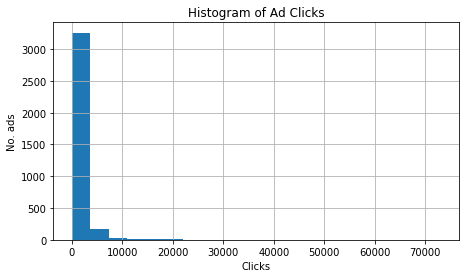

In [6]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot LoanAmount
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Ad Clicks")
ax1.set_xlabel('Clicks')
ax1.set_ylabel('No. ads')
df['ad_clicks'].hist(bins=20)

This graph shows that having more ads does not guarantee more clicks from users. In fact, the graph implies that most people will only click ads when exposed to a maximum number of ads, which is below 1000.

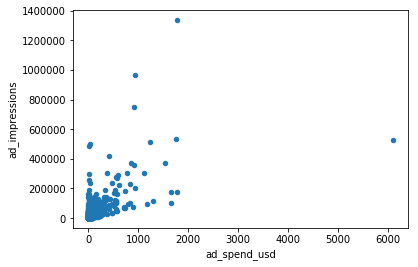

In [7]:
df.plot.scatter(x='ad_spend_usd', y='ad_impressions')

This graph shows that spending more money, in US Dollars, in advertising is beneficial to impressions until a mark is reached and spending more and more money will not promise more clicks.

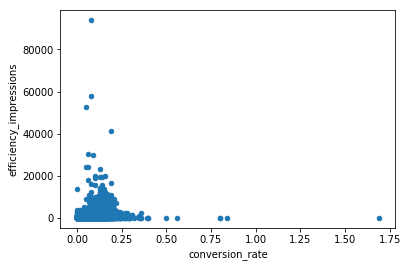

In [8]:
df.plot.scatter(x='conversion_rate', y='efficiency_impressions')

This graph shows higher conversion rates are not dependant on greater impressions and, therefore, better impressions won't necessarily convert a customer over, if it does so at all.

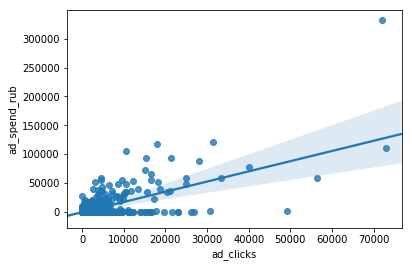

In [9]:
sns.regplot(x="ad_clicks", y="ad_spend_rub", data=df)

This graph shows that more expenditure in Russian Rubles into online advertising increases chances of people clicking on said advertisements

Text(0, 0.5, 'ad_spend_usd')

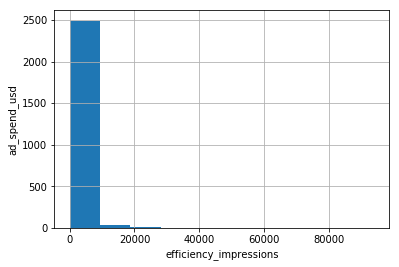

In [10]:
df['efficiency_impressions'].hist(bins=10)
plt.xlabel("efficiency_impressions")
plt.ylabel('ad_spend_usd')

This graph shows that excessive spending of money (in US Dollars) was too inefficient to draw customers in and that only a certain amount of expenditure was required to make an impression on most of the audience. 

Despite the previous graph showing that spending more money attracts more customers, this one shows that cheaper, simple advertising was enough to attract users. 

Text(0, 0.5, 'efficiency_impressions')

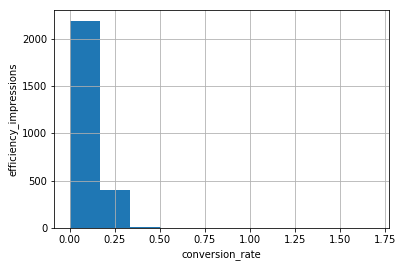

In [11]:
df['conversion_rate'].hist(bins=10)
plt.xlabel("conversion_rate")
plt.ylabel('efficiency_impressions')

This graph shows that the efficiency on having many impressions is indeed proportional to customer converstion rate

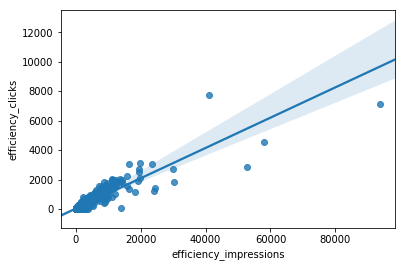

In [12]:
sns.regplot(x="efficiency_impressions", y="efficiency_clicks", data=df)

This graph shows that advertisements leaving many impressions on users is pivotal to advertisers for earning clicks

Text(0, 0.5, 'ad_clicks')

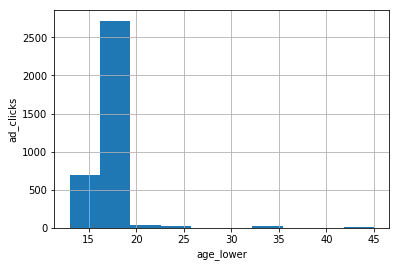

In [13]:
df['age_lower'].hist(bins=10)
plt.xlabel('age_lower')
plt.ylabel('ad_clicks')

This graph further demonstrates that younger Internet users were more susceptible to clicking ads than older users

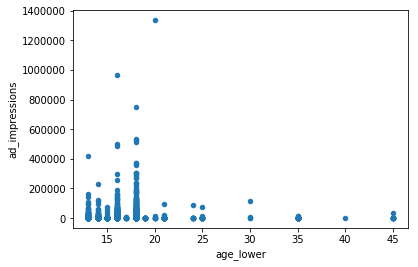

In [14]:
df.plot.scatter(x='age_lower', y='ad_impressions')

This graph shows that ads leave a greater impression on younger users than older ones

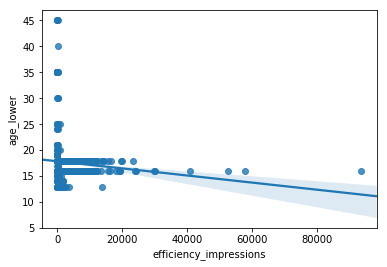

In [15]:
sns.regplot(x='efficiency_impressions', y='age_lower', data=df)

This specific graph shows that older web users are less suspectible to being affected by ads in the advertiser's favour than younger ones and also demonstrates that exposing older users to the same amount of advertising as younger users will have fewer impressions as a result.

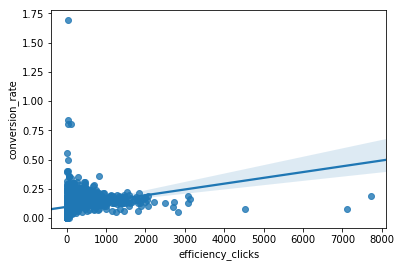

In [16]:
sns.regplot(x="efficiency_clicks", y="conversion_rate", data=df)

The graph shows as steady increase in conversion rate in proportion to click efficiency. 

However, there seems to be an overlapping theme of data being clumped into one cluster as the graph also shows that higher efficiency clicks does not guarantee a higher chance of converting the user.

Text(0, 0.5, 'conversion_rate')

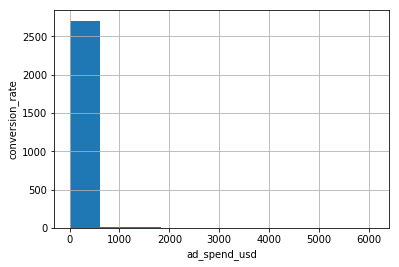

In [17]:
df['ad_spend_usd'].hist(bins=10)
plt.xlabel('ad_spend_usd')
plt.ylabel('conversion_rate')

Much of this information seems to say that increasing expenditure beyond a certain amount will not guarantee earning more customers, despite the initial general trend in may graphs showing that increasing expenditure is beneficial for business

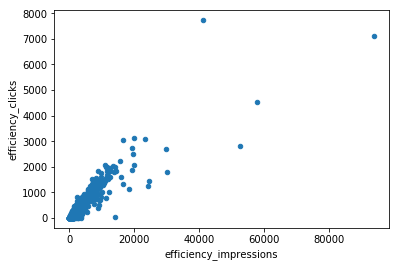

In [18]:
df.plot.scatter(x='efficiency_impressions', y='efficiency_clicks')

This graphs shows a correlation between impressions ads leave on users and the effieciency at which these ads leave an impression on them.

The conclusion I have drawn from these graphs is that spending more money on advertising leads to leaving many impressions on more people and ultimately more clicks on adverts. 

Ultimately, this wins more users over and profiting more, up until a certain point when "trying too hard" and spending more and more money does not guarantee more efficient clicks or more customers. 

A range of expenditures and rates of impressions seems to be in effect here.

# 2. Data Preparation (Joe)
See Week 4 -> Lab 3

In [19]:
df.apply(lambda x: sum(x.isnull()), axis=0)

language_categories              0
placement_categories             0
interests_categories             0
location_categories              0
ad_id                          151
ad_copy                         40
ad_landing_page                 29
ad_targeting_location           31
age_lower                        1
age_upper                        1
age                              1
placements                       0
ad_impressions                   3
ad_clicks                        0
ad_spend_rub                   787
ad_creation_date                 2
month                            0
year                             0
day                              0
ad_end_date                   1144
extra_data                       1
pdf_filepath                     0
image_filepath                   0
interest_expansion             292
excluded_connections          2559
language                      1909
ad_spend_usd                   787
efficiency_impressions         972
efficiency_clicks   

In [20]:
df[df.duplicated(["ad_id"], keep=False)]

,language_categories,placement_categories,interests_categories,location_categories,ad_id,ad_copy,ad_landing_page,ad_targeting_location,age_lower,age_upper,age,placements,ad_impressions,ad_clicks,ad_spend_rub,ad_creation_date,month,year,day,ad_end_date,extra_data,pdf_filepath,image_filepath,interest_expansion,excluded_connections,language,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,interests_categories_regex,location_categories_regex,date_order_index
114,[English],[Facebook],"[Unknown, Geographic, LGBTQ]",[],NaN,We speak for all fellow members of LGBT commun...,https://www.facebook.com/LGBT-United-839497472...,United States,18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,0.0,0,NaN,06/22/2015,[06],[2015],22,None,Completed at the Direction of Ranking Memberof...,2015-06/P10005957.pdf,2015-06/P10005957.-000.png,"Motherhood, LGBT community, Indiana, Homosexua...",LGBT U,English (UK)or English (US),NaN,NaN,NaN,NaN,Unknown_Geographic_LGBTQ,,66
463,[Not Specified],[Facebook],[],[],NaN,This is the real problem,https://www.facebook.com/Stop-Refugees-8310552...,Living In: United States,18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,0.0,0,NaN,10/13/2015,[10],[2015],13,10/14/2015,Completed at the Direction of Ranking Memberof...,2015-10/P10006173.pdf,missing_ad.png,None,None,None,NaN,NaN,NaN,NaN,,,448
1225,[English],[Facebook],"[Products, Below Age 30]",[],NaN,Free online player: Just add in ur browser and...,https://musicfb.info/,United States,15.0,25.0,15-25,News Feed on desktop computers,0.0,0,NaN,05/12/2016,[05],[2016],12,None,Completed at the Direction of Ranking Memberof...,2016-05/P10005969.pdf,2016-05/P10005969.-000.png,Music,None,English (UK) or English (US),NaN,NaN,NaN,NaN,Products_Below Age 30,,1309
1227,[English],[Facebook],[Products],[],NaN,Free online player! Jump in the world of free ...,https://musicfb.info/,United States,13.0,30.0,13-30,News Feed on desktop computers,0.0,0,NaN,05/12/2016,[05],[2016],12,None,Completed at the Direction of Ranking Memberof...,2016-05/P10005973.pdf,2016-05/P10005973.-000.png,free music or Free softwa,None,English (UK) or English (US),NaN,NaN,NaN,NaN,Products,,1307
1228,[English],[Facebook],"[Products, Below Age 30]",[],NaN,Free online player! Jump in the world of free ...,https://musicfb.info/,United States,15.0,25.0,15-25,News Feed on desktop computers,0.0,0,NaN,05/12/2016,[05],[2016],12,None,Completed at the Direction of Ranking Memberof...,2016-05/P10005975.pdf,2016-05/P10005975.-000.png,Music,None,English (UK) or English (US),NaN,NaN,NaN,NaN,Products_Below Age 30,,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,[Not Specified],[Facebook],[Anti-Immigrant],[],NaN,This invasive war cult has no place in any civ...,https://www.facebook.com/StopAllInvaders/,Living In: United States,18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,6355.0,1015,200.00,05/17/2017,[05],[2017],17,05/19/2017,Completed at the Direction of Ranking Memberof...,2017-05/P10005883.pdf,2017-05/P10005883.-000.png,"People who like Stop A.I., Friends of connecti...",None,None,3.53,1800.28,287.54,0.16,Anti-Immigrant,,3385
3445,[English],[Facebook],[Progressive],[],NaN,Our page is the living evidence of importance ...,https://www.facebook.com/Watch-the-Police-1095...,Living In: United States,18.0,999.0,18-65+,"News Feed on desktop computers, News Feed on m...",955.0,50,500.00,05/18/2017,[05],[2017],18,None,Completed at the Direction of Ranking Memberof...,2017-05/P10005953.pdf,2017-05/P10005953.-000.png,"Police corruption, Filming Cops or Cop Block",Watch the P,English (UK)or English (US),8.62,110.79,5.80,0.05,Progressive,,3404
3451,[Not Specified],[Facebook],"[Unknown, African American]",[],NaN,"Explosion in Manchester, ISIS attack in Marawi...",https://www.facebook.com/WiIliamsandKalvin/,Living In: United States,18.0,999.0,18-65+,News Feed on deskt

#### Remake the ad_id column by resetting and renaming the index:

In [21]:
# Replace null values with value from list
df = df.reset_index()
df.drop(['ad_id'], axis=1, inplace=True)
df.rename(columns = {'index':'ad_id'}, inplace = True)
df

,ad_id,language_categories,placement_categories,interests_categories,location_categories,ad_copy,ad_landing_page,ad_targeting_location,age_lower,age_upper,age,placements,ad_impressions,ad_clicks,ad_spend_rub,ad_creation_date,month,year,day,ad_end_date,extra_data,pdf_filepath,image_filepath,interest_expansion,excluded_connections,language,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,interests_categories_regex,location_categories_regex,date_order_index
0,0,[Not Specified],[Facebook],[],"[Midwest, Atlantic]","""Free Figure's Black Power Rally at VCU:""",https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland: Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,764.0,43,90.86,06/15/2015,[06],[2015],15,06/16/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002117.pdf,missing_ad.png,None,None,None,1.66,460.24,25.90,0.06,,Midwest_Atlantic,41
1,1,[Not Specified],[Facebook],[],"[Midwest, Atlantic]",A woman pretended Afro-American to gain contro...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,676.0,47,89.51,06/15/2015,[06],[2015],15,06/16/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002118.pdf,missing_ad.png,None,None,None,1.63,414.72,28.83,0.07,,Midwest_Atlantic,42
2,2,[Not Specified],[Facebook],[],"[Midwest, Atlantic]",2Pac believed in FightTupac Shakur was indeed ...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,1075.0,47,174.40,06/16/2015,[06],[2015],16,06/17/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002119.pdf,missing_ad.png,None,None,None,3.21,334.89,14.64,0.04,,Midwest_Atlantic,43
3,3,[Not Specified],[Facebook],[African American],"[Midwest, Atlantic]",Today we celebrate the legendary rapper who ev...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland: Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,153.0,10,90.07,06/16/2015,[06],[2015],16,06/17/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002120.pdf,missing_ad.png,People who like Black Matters. Friends of conn...,None,None,1.66,92.17,6.02,0.07,African American,Midwest_Atlantic,44
4,4,[Not Specified],[Facebook],[],"[Midwest, Atlantic]",It is an American history. African-American ci...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,476.0,26,84.15,06/16/2015,[06],[2015],16,06/17/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002121.pdf,missing_ad.png,None,None,None,1.55,307.10,16.77,0.05,,Midwest_Atlantic,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3512,3512,[Not Specified],[Facebook],"[Conservative, Christianity, Anti-Immigrant]",[],Today Americans are able to elect a president ...,https://www.facebook.com/login/?next=https%3A%...,Living In: United States,18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,0.0,0,NaN,07/27/2017,[07],[2017],27,10/20/2016,Completed at the Direction of Ranking Memberof...,2017-07/P10003125.pdf,2017-07/P10003125.-000.png,"Stop Illegal Immigration, Laura Ingraham, FoxN...",None,None,NaN,NaN,NaN,NaN,Conservative_Christianity_Anti-Immigrant,,3514
3513,3513,[Not Specified],[Facebook],"[Conservative, Christianity, Anti-Immigrant]",[],Secured borders are a national priority. Ameri...,https://www.facebook.com/Secured.Borders/,Living In: United States,18.0,999.0,18-65+,"News Feed on desktop computers, News Feed on m...",3069.0,291,2095.96,07/27/2017,[07],[2017],27,07/29/2017,Completed at the Direction of Ranking Memberof...,2017-07/P1

In [22]:
df[df.duplicated(["ad_id"], keep=False)]

,ad_id,language_categories,placement_categories,interests_categories,location_categories,ad_copy,ad_landing_page,ad_targeting_location,age_lower,age_upper,age,placements,ad_impressions,ad_clicks,ad_spend_rub,ad_creation_date,month,year,day,ad_end_date,extra_data,pdf_filepath,image_filepath,interest_expansion,excluded_connections,language,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,interests_categories_regex,location_categories_regex,date_order_index


In [23]:
df["ad_copy"] = df["ad_copy"].fillna("")
df["ad_landing_page"] = df["ad_landing_page"].fillna("")

The ad_copy feature contains information on the ad text. It is impossible to predict this based on other results unless we use some image recognition algorithm on each image. As this is outside the scope of the project I will just set all the NaN values to an empty string, we can drop these columns if necessary. This is also the case for ad_landing_page it is impossible to predict this.

In [24]:
df["ad_targeting_location"].value_counts()

United States                                                                                                                                 1348
Living In: United States                                                                                                                      1280
Living In: United States: New York (+25 mi) New York                                                                                            53
United States: Baltimore Maryland; Ferguson, St. Louis Missouri;Cleveland Ohio                                                                  52
United States: Texas                                                                                                                            50
                                                                                                                                              ... 
United States: Jackson (+17 km) Mississippi                                                                           

Over 2500 rows are stated as targeted in the general area of the United States. This large proportion is enough to assume the 31 missing values could easily be targeted in the general area of the United States, thus we will set these missing values to 'United States'.

In [25]:
df["ad_targeting_location"] = df["ad_targeting_location"].fillna("United States")

In [26]:
df1 = df[df["age"].isna()]

In [27]:
df1

,ad_id,language_categories,placement_categories,interests_categories,location_categories,ad_copy,ad_landing_page,ad_targeting_location,age_lower,age_upper,age,placements,ad_impressions,ad_clicks,ad_spend_rub,ad_creation_date,month,year,day,ad_end_date,extra_data,pdf_filepath,image_filepath,interest_expansion,excluded_connections,language,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,interests_categories_regex,location_categories_regex,date_order_index
2211,2211,[Not Specified],[Facebook],"[Unknown, African American]",[],"Joshua was born in Chicago, Illinois, and rais...",https://www.facebook.com/Woke-Blacks-294234600...,Living In: United States,NaN,NaN,None,News Feed on desktop computers or News Feed on...,4736.0,557,65.0,11/08/2016,[11],[2016],8,11/09/2016,Completed at the Direction of Ranking Memberof...,2016-11/P10005753.pdf,2016-11/P10005753.-000.png,"Martin Luther King, Jr., African-American Civi...",None,None,1.02,4643.14,546.08,0.12,Unknown_African American,,2218


As we can see the same row that age is missing in is the same row than age_lower and age_upper is missing in. Since this is a single row, it is not worth our time to predict these values so we will drop the column.

In [28]:
df = df.drop([2211])

For ad_impressions I do not want to just use mean value to fill in the 3 missing rows as I think it is a feature of too much importance to just fill in mean values. Since there are only 3 rows with missings values for this, it is again not worth our time to try and predict the value by any more complex method that might be more accurate than mean, thus we drop the rows.

In [29]:
df = df[pd.notnull(df['ad_impressions'])]

In [30]:
df[df["ad_spend_rub"].isna()][df.columns[df.isna().any()]]

,ad_spend_rub,ad_creation_date,ad_end_date,extra_data,interest_expansion,excluded_connections,language,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate
11,NaN,06/24/2015,06/25/2015,Completed at the Direction of Ranking Memberof...,People who like Black Matters. Friends of conn...,None,None,NaN,NaN,NaN,NaN
13,NaN,06/18/2015,06/19/2015,Completed at the Direction of Ranking Memberof...,"People who like Black Matters, Friends of conn...",None,None,NaN,NaN,NaN,NaN
14,NaN,06/09/2015,06/10/2015,Completed at the Direction of Ranking Memberof...,None,None,None,NaN,NaN,NaN,NaN
16,NaN,06/23/2015,None,Completed at the Direction of Ranking Memberof...,Independence or Patriotism,Being P,English (UK)or English (US),NaN,NaN,NaN,NaN
18,NaN,06/10/2015,None,Completed at the Direction of Ranking Memberof...,None,Black M,English (UK)or English (US),NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3478,NaN,05/04/2017,05/07/2017,Completed at the Direction of Ranking Memberof...,"Martin Luther King, Jr., African-American Civi...",None,None,NaN,NaN,NaN,NaN
3488,NaN,05/18/2017,None,Completed at the Direction of Ranking Memberof...,"Deportation, Stop Illegal Immigration, Illegal...",Stop A.1.,English (UK)or English (US),NaN,NaN,NaN,NaN
3510,NaN,07/16/2017,07/19/2017,Completed at the Direction of Ranking Memberof...,"Immigration to the United States, Conservatism...",Secured B,None,NaN,NaN,NaN,NaN
3512,NaN,07/27/2017,10/20/2016,Completed at the Direction of Ranking Memberof...,"Stop Illegal Immigration, Laura Ingraham, FoxN...",None,None,NaN,NaN,NaN,NaN


Approx 25% of the data is missing values for ad_spend_rub(usd). Normally, one would drop that column but since it is a column of serious importance that is unviable. One could predict the value by finding a correlation between it and other columns, simply by average or other methods. This may compromise the integrity of the dataset though by setting incorrect datas to such an important column, thus we have decided to drop the rows with missing values for ad_spend_rub(usd) as we will still have over 2000 rows.

In [31]:
df = df[pd.notnull(df['ad_spend_rub'])]

ad_creation_date and extra_data have 2 and 1 missing values respectively, we will drop these rows.

In [32]:
df = df[pd.notnull(df['ad_creation_date'])]
df = df[pd.notnull(df['extra_data'])]

excluded_connections and language have much more than 25% missing values, and as they are of little importance we drop the columns.

In [33]:
df = df.drop(['excluded_connections'], axis = 1)
df = df.drop(['language'], axis = 1)


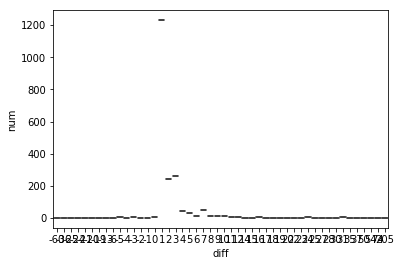

In [34]:
dfDates = df[['ad_creation_date', 'ad_end_date']].dropna()

dfDates['ad_end_date'] = pd.to_datetime(dfDates['ad_end_date'])
dfDates['ad_creation_date'] = pd.to_datetime(dfDates['ad_creation_date'])
dfDates['diff'] = dfDates['ad_end_date'] - dfDates['ad_creation_date']

dfDates = dfDates.groupby('diff', as_index=False).count()

dfDates = dfDates.drop(['ad_creation_date'], axis = 1)
dfDates.columns = ['diff', 'num']

dfDates['diff'] = dfDates['diff'].astype(str)
dfDates['diff'] = dfDates['diff'].str.split().str.get(0)
dfDates['diff'] = dfDates['diff'].astype(int)

ax = sns.boxplot(x="diff", y="num", data=dfDates)

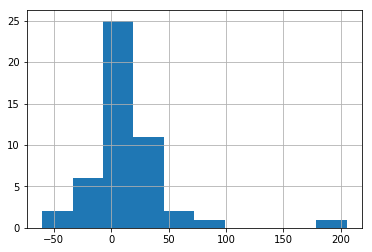

In [35]:
dfDates['diff'].hist(bins=10)

With over 25% of rows missing data for ad_end_date and values being scattered we will drop the column

In [36]:
df = df.drop(['ad_end_date'], axis = 1)

In [37]:
df.corr()

,ad_id,age_lower,age_upper,ad_impressions,ad_clicks,ad_spend_rub,day,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,date_order_index
ad_id,1.000000,0.004254,0.230535,0.045792,0.133679,-0.098726,0.159173,-0.089618,0.292770,0.361371,0.224432,0.993630
age_lower,0.004254,1.000000,0.106767,-0.054593,-0.038711,0.011223,-0.000555,0.014551,-0.102872,-0.096101,-0.007520,0.002506
age_upper,0.230535,0.106767,1.000000,0.029908,0.082511,-0.017433,0.070647,-0.010237,0.126674,0.153801,0.219574,0.230836
ad_impressions,0.045792,-0.054593,0.029908,1.000000,0.890688,0.633649,-0.035736,0.614588,0.271607,0.223252,-0.047721,0.046087
ad_clicks,0.133679,-0.038711,0.082511,0.890688,1.000000,0.654923,-0.011791,0.653595,0.401290,0.431378,0.097013,0.135243
ad_spend_rub,-0.098726,0.011223,-0.017433,0.633649,0.654923,1.000000,-0.023791,0.994651,-0.062938,-0.079554,-0.072625,-0.102656
day,0.159173,-0.000555,0.070647,-0.035736,-0.011791,-0.023791,1.000000,-0.018886,0.002429,0.019760,0.099594,0.201226
ad_spend_usd,-0.089618,0.014551,-0.010237,0.614588,0.653595,0.994651,-0.018886,1.000000,-0.058813,-0.074124,-0.065163,-0.093188
efficiency_impressions,0.292770,-0.102872,0.126674,0.271607,0.401290,-0.062938,0.002429,-0.058813,1.000000,0.908252,0.119947,0.292878
efficiency_clicks,0.361371,-0.096101,0.153801,0.223252,0.431378,-0.079554,0.019760,-0.074124,0.908252,1.000000,0.256620,0.361716


With no real correlation between efficiency_clicks and efficiency_impressions and conversion_rate with any other column, it will be difficult to impute the values with any other way other than averaging, thus we will set the missing values to be the median.

In [38]:
df['efficiency_clicks'] = df['efficiency_clicks'].fillna(df['efficiency_clicks'].median())
df['efficiency_impressions'] = df['efficiency_impressions'].fillna(df['efficiency_impressions'].median())
df['conversion_rate'] = df['conversion_rate'].fillna(df['conversion_rate'].median())

##### Our binarizer fills the role of the interest and location expansion columns, we will drop these columns:

In [39]:
df = df.drop(['interest_expansion', 'location_categories_regex', 'interests_categories_regex'], axis = 1)

### OUTLIERS

In [40]:
dfnocat = df.select_dtypes([np.number])
zs = np.abs(stats.zscore(dfnocat))
threshold = 3
df = df[(zs < 3).all(axis=1)]

In [41]:
df.interests_categories = df.interests_categories.apply(lambda y: np.array(['Unknown']) if len(y)==0 else y)
df.location_categories = df.location_categories.apply(lambda y: np.array(['location_unknown']) if len(y)==0 else y)

#### Converting lists to tuples

In [42]:
listCols = ['language_categories', 'placement_categories', 'interests_categories', 'location_categories']
dateCols = ['month', 'year']

for col in listCols:
    df[col] = df[col].transform(tuple)

for col in dateCols:
    df[col] = df[col].apply(''.join).astype(int)
    
df.head(5)

,ad_id,language_categories,placement_categories,interests_categories,location_categories,ad_copy,ad_landing_page,ad_targeting_location,age_lower,age_upper,age,placements,ad_impressions,ad_clicks,ad_spend_rub,ad_creation_date,month,year,day,extra_data,pdf_filepath,image_filepath,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,date_order_index
0,0,"(Not Specified,)","(Facebook,)","(Unknown,)","(Midwest, Atlantic)","""Free Figure's Black Power Rally at VCU:""",https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland: Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,764.0,43,90.86,06/15/2015,6,2015,15,Completed at the Direction of Ranking Memberof...,2015-06/P10002117.pdf,missing_ad.png,1.66,460.24,25.90,0.06,41
1,1,"(Not Specified,)","(Facebook,)","(Unknown,)","(Midwest, Atlantic)",A woman pretended Afro-American to gain contro...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,676.0,47,89.51,06/15/2015,6,2015,15,Completed at the Direction of Ranking Memberof...,2015-06/P10002118.pdf,missing_ad.png,1.63,414.72,28.83,0.07,42
2,2,"(Not Specified,)","(Facebook,)","(Unknown,)","(Midwest, Atlantic)",2Pac believed in FightTupac Shakur was indeed ...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,1075.0,47,174.40,06/16/2015,6,2015,16,Completed at the Direction of Ranking Memberof...,2015-06/P10002119.pdf,missing_ad.png,3.21,334.89,14.64,0.04,43
3,3,"(Not Specified,)","(Facebook,)","(African American,)","(Midwest, Atlantic)",Today we celebrate the legendary rapper who ev...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland: Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,153.0,10,90.07,06/16/2015,6,2015,16,Completed at the Direction of Ranking Memberof...,2015-06/P10002120.pdf,missing_ad.png,1.66,92.17,6.02,0.07,44
4,4,"(Not Specified,)","(Facebook,)","(Unknown,)","(Midwest, Atlantic)",It is an American history. African-American ci...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,476.0,26,84.15,06/16/2015,6,2015,16,Completed at the Direction of Ranking Memberof...,2015-06/P10002121.pdf,missing_ad.png,1.55,307.10,16.77,0.05,45


### Binarizing Interests & Locations

#### Replace empty lists with unknown:

In [43]:
df.interests_categories = df.interests_categories.apply(lambda y: np.array(['interest_unknown']) if len(y)==0 else y)
df.location_categories = df.location_categories.apply(lambda y: np.array(['location_unknown']) if len(y)==0 else y)

#### Binarize the list columns we're interested in:

In [44]:
from sklearn.preprocessing import MultiLabelBinarizer

cols = ['interests_categories', 'location_categories']
dfEncoded = df[['interests_categories', 'location_categories', 'ad_id']]
mlb = MultiLabelBinarizer()
for col in cols:
    dfEncoded = dfEncoded.join(pd.DataFrame(mlb.fit_transform(dfEncoded.pop(col)),
                                            columns=mlb.classes_,
                                            index=dfEncoded.index))

#### Merge back into dataset:

In [45]:
df = pd.merge(df, dfEncoded, on='ad_id', how='inner')

In [46]:
df.head(3)

,ad_id,language_categories,placement_categories,interests_categories,location_categories,ad_copy,ad_landing_page,ad_targeting_location,age_lower,age_upper,age,placements,ad_impressions,ad_clicks,ad_spend_rub,ad_creation_date,month,year,day,extra_data,pdf_filepath,image_filepath,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,date_order_index,African American,American South,Anti-Immigrant,Army,Below Age 30,Christianity,Conservative,Geographic,Gun Rights,Islam,LGBTQ,Latinx,Memes,Memes and Products,Native American,Patriotism,Police,Prison,Products,Progressive,Self-Defense,Texas,Unknown,Atlantic,Midwest,Non-US,Northeast,Pacific,Southwest,The South,location_unknown
0,0,"(Not Specified,)","(Facebook,)","(Unknown,)","(Midwest, Atlantic)","""Free Figure's Black Power Rally at VCU:""",https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland: Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,764.0,43,90.86,06/15/2015,6,2015,15,Completed at the Direction of Ranking Memberof...,2015-06/P10002117.pdf,missing_ad.png,1.66,460.24,25.90,0.06,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
1,1,"(Not Specified,)","(Facebook,)","(Unknown,)","(Midwest, Atlantic)",A woman pretended Afro-American to gain contro...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,676.0,47,89.51,06/15/2015,6,2015,15,Completed at the Direction of Ranking Memberof...,2015-06/P10002118.pdf,missing_ad.png,1.63,414.72,28.83,0.07,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
2,2,"(Not Specified,)","(Facebook,)","(Unknown,)","(Midwest, Atlantic)",2Pac believed in FightTupac Shakur was indeed ...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,1075.0,47,174.40,06/16/2015,6,2015,16,Completed at the Direction of Ranking Memberof...,2015-06/P10002119.pdf,missing_ad.png,3.21,334.89,14.64,0.04,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0


# 3. Pipelines, incl. Classifiers, Feature Selection (Adam)
See Week 5 -> Lab 4, 5

While the values of a column like 'efficiency_impressions' or 'efficiency_clicks' seem as though they would be intesting, these column have been calculated by other columns and as such would not be very interesting to predict.
Because of this, we aim to predict the number of impressions an add gets based on it's other attributes

**Drop unwanted columns**
We will first drop a few columns that will not add to our model in prediciting our desired feature.
We are dropping *ad_clicks, efficiency_impressions, efficiency_clicks* and *conversion_rate*.

*ad_clicks* is a percentage of our desired column and therefore does not effect the value of *ad_impressions*.
We decided to also drop the efficiency and conversion rate columns due to them being calculated from other columns

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# drop categorical data columns that have been expanded and converted to numerical data 
dfPipe = df.select_dtypes(exclude=['object'])
dfPipe = dfPipe.drop(['ad_clicks', 'efficiency_impressions', 'efficiency_clicks', 'conversion_rate'], axis=1)

**Split the data set**
Here we drop the target attribute *ad_impressions* and split both predictor and target set into 80% train, 20% train

In [48]:
X = dfPipe.drop('ad_impressions', axis=1).values
target = dfPipe['ad_impressions']
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size=0.2)

Scale data with a standard scaler. A StandardScaler was used insead of other options, such as MinMaxScaler as not ass not all of the data we are looking at is binary, Columns which are binary, the values have already been set to 0 or 1.

In [49]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler(with_mean=False)

In [50]:
dfAccs = pd.DataFrame(columns = ['classifier', 'score'])

Classifiers choosen according to [this](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) link. We followed Scikit suggestion based on the type of data we have in our DataFram

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import RFE, RFECV, mutual_info_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

selectors = [
    (RFE(SVR(kernel='linear')), 'SVR'),
    (RFE(LinearSVR()), 'LinearSVR'),
    (RFE(Ridge(alpha=0.5)), 'Ridge0.5'),
    (RFE(Lasso(alpha=0.2)), 'Lasso0.2')
    ]

highestAcc = 0
bestModel = None

for selector in selectors:
    model = Pipeline(steps=[('scaler', std_scaler),
                            ('feature_selector', selector[0]),
                            ('classifier', LinearSVR())
                           ])
    kfold = KFold(n_splits=3, random_state=1024)
    accuracies = cross_val_score(model, X, target, cv=kfold, scoring='explained_variance')
    if(np.mean(accuracies) > highestAcc):
        highestAcc = np.mean(accuracies)
        bestModel = model
    dfAccs = dfAccs.append({'classifier':selector[1], 'score':np.mean(accuracies)}, ignore_index=True)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [52]:
dfAccs

,classifier,score
0,SVR,0.059644
1,LinearSVR,0.069689
2,Ridge0.5,0.055668
3,Lasso0.2,0.059168


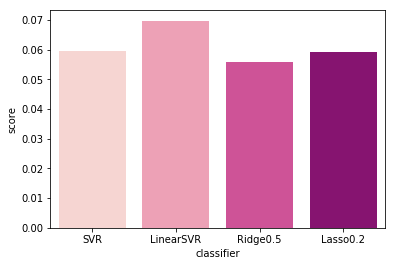

In [53]:
sns.barplot(x="classifier", y="score", palette='RdPu', data=dfAccs)

We can see from both the DafaFrame and the barplot above that using the LinearSVR is the classifier best fit to this data set. While, it's mean cross validation score is roughly x2 compare to Ridge and Lasso and both SVR and NuSVR are near zero or negative, none of the classifiers produce a good predictive model - each model has CV score < 0.1

* **Issues encountered**  When attempting to us the LogisticRegression classifier, we were unable to find paramteres that allowed it to converge with this dataset, hence it is excluded from the list of classifiers


**Making a prediction** 
From our testing we can see that either ridge or Lasso will predict correctly a little over 50% of the time. As one of these is our best model, we will attempt to make a prediction using that model

In [54]:
std_scaler.fit(X_test)
bestModel.fit(X_test, target_test)
target_predicted = bestModel.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [55]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(target_test, target_predicted))
rms

15951.254590438568

**RMSE conclusion**
This is not good, there is a huge amount of varience in the data set and making predictions is not easy.

# 5. Clustering and Manifold Learning (Niall)

### Importing modules, data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import cycle

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AffinityPropagation

pd.set_option('display.max_columns', None)

#### Scatterplot function
From lab 6

In [2]:
colors = np.array(['orange', 'blue', 'green', 'black', 'pink', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [3]:
dfCluster = pd.read_json("./russian_ads.json")

In [4]:
dfCluster.head(3)

,language_categories,placement_categories,interests_categories,location_categories,ad_id,ad_copy,ad_landing_page,ad_targeting_location,age_lower,age_upper,age,placements,ad_impressions,ad_clicks,ad_spend_rub,ad_creation_date,month,year,day,ad_end_date,extra_data,pdf_filepath,image_filepath,interest_expansion,excluded_connections,language,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,interests_categories_regex,location_categories_regex,date_order_index
0,[Not Specified],[Facebook],[],"[Midwest, Atlantic]",331.0,"""Free Figure's Black Power Rally at VCU:""",https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland: Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,764.0,43,90.86,06/15/2015,[06],[2015],15,06/16/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002117.pdf,missing_ad.png,None,None,None,1.66,460.24,25.90,0.06,,Midwest_Atlantic,41
1,[Not Specified],[Facebook],[],"[Midwest, Atlantic]",332.0,A woman pretended Afro-American to gain contro...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,676.0,47,89.51,06/15/2015,[06],[2015],15,06/16/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002118.pdf,missing_ad.png,None,None,None,1.63,414.72,28.83,0.07,,Midwest_Atlantic,42
2,[Not Specified],[Facebook],[],"[Midwest, Atlantic]",333.0,2Pac believed in FightTupac Shakur was indeed ...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,1075.0,47,174.40,06/16/2015,[06],[2015],16,06/17/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002119.pdf,missing_ad.png,None,None,None,3.21,334.89,14.64,0.04,,Midwest_Atlantic,43


In [5]:
dfCluster['num_interests'] = dfCluster['interests_categories'].str.len()
dfCluster['num_locs'] = dfCluster['location_categories'].str.len()

In [6]:
dfCluster.tail(3)

,language_categories,placement_categories,interests_categories,location_categories,ad_id,ad_copy,ad_landing_page,ad_targeting_location,age_lower,age_upper,age,placements,ad_impressions,ad_clicks,ad_spend_rub,ad_creation_date,month,year,day,ad_end_date,extra_data,pdf_filepath,image_filepath,interest_expansion,excluded_connections,language,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,interests_categories_regex,location_categories_regex,date_order_index,num_interests,num_locs
3514,[Not Specified],[Facebook],"[Progressive, Conservative]",[],NaN,Bernie for president!,https://www.facebook.com/Born-Liberal-52262856...,United States,18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,0.0,0,NaN,07/14/2016,[07],[2016],14,06/08/2016,Completed at the Direction of Ranking Memberof...,2017-07/P10004845.pdf,2017-07/P10004845.-000.png,Liberalism or Libertarianism,None,None,NaN,NaN,NaN,NaN,Progressive_Conservative,,1636,2,0
3515,[English],[Facebook],[Progressive],[],2430.0,"New ideas, old values. Like us!",https://www.facebook.com/bornliberal/,Living In: United States,18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,49920.0,4799,36629.80,07/14/2016,[07],[2016],14,None,Completed at the Direction of Ranking Memberof...,2017-07/P10004855.pdf,2017-07/P10004855.-000.png,"Bernie Sanders, Social democracy, Liberalismor...",Born Lib,English (UK)or English (US),579.94,86.08,8.27,0.1,Progressive,,1634,1,0
3516,[Not Specified],[Facebook],"[Conservative, Christianity, Anti-Immigrant]",[],1253.0,Secured borders are a national priority. Ameri...,https://www.facebook.com/Secured.Borders/,Living In: United States,18.0,999.0,18-65+,"News Feed on desktop computers, News Feed on m...",2781.0,282,2094.74,08/13/2017,[08],[2017],13,08/15/2017,Completed at the Direction of Ranking Memberof...,2017-08/P10003115.pdf,2017-08/P10003115.-000.png,"Stop Illegal Immigration, Laura Ingraham, FoxN...",None,None,35.03,79.39,8.05,0.1,Conservative_Christianity_Anti-Immigrant,,3516,3,0


### (Data Prep) Converting lists into tuples, numbers

In [7]:
listCols = ['language_categories', 'placement_categories', 'interests_categories', 'location_categories']
dateCols = ['month', 'year']
numCols = ['age_lower', 'age_upper', 'ad_impressions', 'ad_clicks', 'ad_spend_usd', 'month', 'year', 'num_interests', 'num_locs']

for col in listCols:
    dfCluster[col] = dfCluster[col].transform(tuple)

for col in dateCols:
    dfCluster[col] = dfCluster[col].apply(''.join).astype(int)
    
for col in numCols:
    dfCluster[col] = pd.to_numeric(dfCluster[col], errors='coerce')
    
dfCluster.head(1)

,language_categories,placement_categories,interests_categories,location_categories,ad_id,ad_copy,ad_landing_page,ad_targeting_location,age_lower,age_upper,age,placements,ad_impressions,ad_clicks,ad_spend_rub,ad_creation_date,month,year,day,ad_end_date,extra_data,pdf_filepath,image_filepath,interest_expansion,excluded_connections,language,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,interests_categories_regex,location_categories_regex,date_order_index,num_interests,num_locs
0,"(Not Specified,)","(Facebook,)",(),"(Midwest, Atlantic)",331.0,"""Free Figure's Black Power Rally at VCU:""",https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland: Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,764.0,43,90.86,06/15/2015,6,2015,15,06/16/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002117.pdf,missing_ad.png,None,None,None,1.66,460.24,25.9,0.06,,Midwest_Atlantic,41,0,2


### Making a dataset out of numeric fields

In [8]:
dfNum = dfCluster[['age_lower', 'age_upper', 'ad_impressions', 'ad_clicks', 'ad_spend_usd', 'month', 'year', 'num_interests', 'num_locs']]
#dfNum['ad_id'] = range(1, len(dfNum) + 1)

dfNum = dfNum.dropna()
num_data = np.array(dfNum.values, dtype=float)

cluster_data = np.array(dfNum.values, dtype=float)
print('(number of examples, number of attributes): ', cluster_data.shape)

(number of examples, number of attributes):  (2726, 9)


### Encoding interesting categorical fields into numbers

In [9]:
from sklearn.preprocessing import MultiLabelBinarizer

cols = ['interests_categories', 'location_categories']
dfEncoded = df[cols]
for col in cols:
    mlb = MultiLabelBinarizer()
    dfEncoded = dfEncoded.join(pd.DataFrame(mlb.fit_transform(dfEncoded.pop(col)),
                                            columns=mlb.classes_,
                                            index=dfEncoded.index))

dfEncoded['ad_id'] = range(1, len(dfEncoded) + 1)
dfEncoded.head(1)

,Above Age 30,African American,American South,Anti-Immigrant,Army,Below Age 30,Christianity,Conservative,Geographic,Gun Rights,Islam,LGBTQ,Latinx,Memes,Memes and Products,Native American,Patriotism,Police,Prison,Products,Progressive,Self-Defense,Texas,Unknown,Atlantic,Midwest,Non-US,Northeast,Pacific,Southwest,The South,ad_id
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1


In [10]:
df = pd.merge(df, dfEncoded, on='ad_id', how='inner').dropna()
# dfNumEncode.drop(['ad_id', 'age_lower', 'age_upper', 'Texas', 'Unknown'], axis=1, inplace=True)
# dfNumEncode.head(1)

### Combining these into a dataframe and array
See conclusion below for why these were eventually omitted

In [11]:
# numEncode_data = np.array(dfNumEncode.values, dtype=float)
# print('(number of examples, number of attributes): ', numEncode_data.shape)

### Scaling the data

In [12]:
min_max_scaler = preprocessing.MinMaxScaler()
num_data = min_max_scaler.fit_transform(num_data)

## K-means Clustering

### Best Value of k?

#### Elbow Method

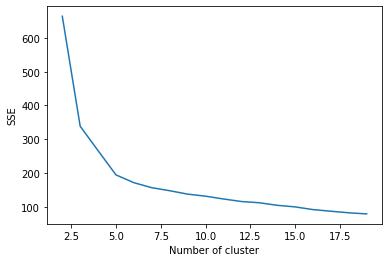

In [13]:
sse = {}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(num_data)
    #numEncode_data['clusters'] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### Silhouette Coefficient Method

In [14]:
for n_cluster in range(2, 20):
    kmeans = KMeans(n_clusters=n_cluster).fit(num_data)
    label = kmeans.labels_
    sil_coeff = silhouette_score(num_data, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.47400357148622124
For n_clusters=3, The Silhouette Coefficient is 0.4970446875626898
For n_clusters=4, The Silhouette Coefficient is 0.4849133192333969
For n_clusters=5, The Silhouette Coefficient is 0.5316596042207945
For n_clusters=6, The Silhouette Coefficient is 0.5094317666254682
For n_clusters=7, The Silhouette Coefficient is 0.5163657287857705
For n_clusters=8, The Silhouette Coefficient is 0.4176312019267323
For n_clusters=9, The Silhouette Coefficient is 0.45382167532442275
For n_clusters=10, The Silhouette Coefficient is 0.3876248852312353
For n_clusters=11, The Silhouette Coefficient is 0.3672725754540254
For n_clusters=12, The Silhouette Coefficient is 0.3985971824817467
For n_clusters=13, The Silhouette Coefficient is 0.351360956393364
For n_clusters=14, The Silhouette Coefficient is 0.3657919310663528
For n_clusters=15, The Silhouette Coefficient is 0.3448004035925407
For n_clusters=16, The Silhouette Coefficient is 0.3653

Initially I ran these tests with all of the data – lists binarized into separate columns for each element. Both of these methods leave an unclear picture re: the optimal value of K.

Our Elbow method produced something not very elbow-looking, and the Silhouette method seemed to be constantly increasing, suggesting that the data is just too varied to produce a small number of clusters. I tested values from 1 to 20 and there just didn't seem to be a good fit.

I experimented with dropping binarized columns (placement categories, interest categories, location categories), and while this did produce better looking k-means graphs, I doubted the usefulness of such clusters. That just left me with [age, impressions, clicks, ad spend, month, year], which wasn't very interesting. 

However, I ultimately realised that the prime motivation behind this propaganda was to sow discord, create confusion, and extremify society as a whole. Trying to find clear patterns in interests/locations is going to be nigh on impossible. Therefore, I settled on focusing on the pure numbers, the columns I mentioned above, as well as adding new columns simply for the number of interests and number of locations targeted. This was to get an idea of how focused the ads were.

With this in mind, both the Elbow and Silhouette methods pointed towards 5 being the optimal value of k.

In [15]:
k = 5
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(num_data)

### Manifold Learning

In [16]:
# append the cluster centers to the dataset
num_data_and_centers = np.r_[num_data, clustered_data_sklearn.cluster_centers_]

####  Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space¶

In [17]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.MDS(n_components=2).fit_transform(num_data_and_centers)
print("transformation complete")

transformation complete


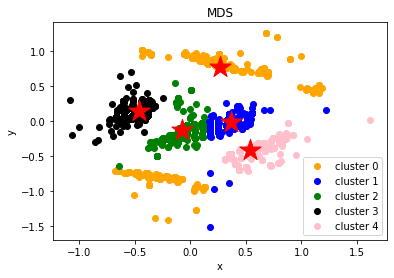

In [18]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

#### Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [19]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(num_data_and_centers)
print("transformation complete")

transformation complete


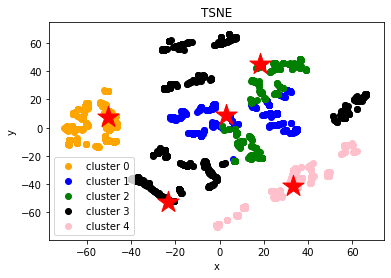

In [20]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

### Clutster Analysis

#### Add the cluster labels as an extra column in the original dataframe

In [21]:
dfNum['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=dfNum.index)

In [22]:
dfNum.head()

,age_lower,age_upper,ad_impressions,ad_clicks,ad_spend_usd,month,year,num_interests,num_locs,cluster
0,18.0,999.0,764.0,43,1.66,6,2015,0,2,4
1,18.0,999.0,676.0,47,1.63,6,2015,0,2,4
2,18.0,999.0,1075.0,47,3.21,6,2015,0,2,4
3,18.0,999.0,153.0,10,1.66,6,2015,1,2,4
4,18.0,999.0,476.0,26,1.55,6,2015,0,2,4


In [23]:
dfNum.groupby('cluster').mean()

,age_lower,age_upper,ad_impressions,ad_clicks,ad_spend_usd,month,year,num_interests,num_locs
cluster,,,,,,,,,
0,17.181609,47.344828,11392.937931,655.287356,38.127011,5.291954,2016.002299,1.588506,0.521839
1,17.683267,999.000000,21906.105578,1756.252988,42.624821,10.468127,2016.000000,1.641434,0.161355
2,18.296296,999.000000,10138.747277,784.779956,29.153529,4.352941,2016.000000,1.440087,0.294118
3,17.864776,999.000000,17002.656489,2051.875682,16.035202,3.633588,2017.000000,1.656489,0.085060
4,17.898305,999.000000,10520.656174,780.372881,64.267094,8.353511,2015.000000,1.033898,0.987893


### Conclusions
The plots produced are fairly solid and discrete, considering the nature of the data, with the MDS production probably being the better of the two.

The column for number of locations probably isn't very reliable here, since there are many missing values.

Looking into the data, we can make some rough conclusions about the nature of each cluster:

  0. All age ranges, with a high average spend but low impressions and clicks. These were more targeted ads, with a low average number of interests but a broader range of locations, and were posted earlier in the campaign, ~ August 2015. At this point, the race wasn't too intense and so people weren't "taking the bait" so much. This was important to lay the foundation for the campaign.
  
  
  1. All age ranges, with a low average spend but the highest average clicks and high impressions. They were also the least targeted ads, at around 1.66 interests targeted per ad, but more focused on location. These were posted later, even after the elecction in ~ March 2017, so it makes sense that ads at this point were less expensive, but tensions still high.
  
  
  2. Not targeting older age groups, with mid-range spend. These got low impressions and clicks, despite being posted in ~ May 2016, certainly a high-intensity period. This could be because the ads weren't very focused in terms of interests or locations, or perhaps the younger age groups simply weren't as susceptible to this advertising.
  
  
  3. All age ranges, low average spend and posted just a month before the previous cluster, but slightly more targeted in interests and locations. Impressions and clicks are still low, however, perhaps due to low spend. Unsure.
  
  
  4. All age ranges, high spend, and rewarded with the highest impressions and second-highest clicks. Posted in ~ October 2016 so right around election time, this was a very important period. These are *broad in interests but narrow in location*, similar to the other high-performing cluster 1. We may have found the key here.

## Affinity Propagation
Chosen for its strength in "Many clusters, uneven cluster size, non-flat geometry"

In [24]:
af_clustering = AffinityPropagation(max_iter=300).fit(num_data)

##### Based on https://scikit-learn.org/stable/auto_examples/cluster/plot_affinity_propagation.html

In [25]:
cluster_centers_indices = af_clustering.cluster_centers_indices_
labels = af_clustering.labels_

n_clusters_ = len(cluster_centers_indices)

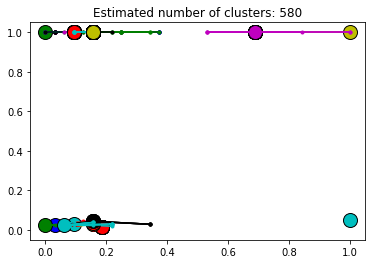

In [26]:
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = num_data[cluster_centers_indices[k]]
    plt.plot(num_data[class_members, 0], num_data[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in num_data[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### What Happened?!
As we can see, this graph is a mess. I was recommended 580 clusters, compared to the 5 from k-means above. I tried multiple different techniques here (Spectral Clustering for clustering, Spectral Embedding and TSNE for manifold learning), but none of them took well.

I think what this shows is that, without enforcing a preset number of clusters, these algorithms simply cannot handle the variance of the dataset. There are two possible conclusions from this.

It's possible that there simply aren't enough samples in the dataset. For such a huge issue, we need more data to understand what's going on.

However, I theorise that even with increased samples, or better labelled ones, we still wouldn't have a clear picture. This demonstrates the effective "randomness" of propaganda. Vladislav Surkov is one of Putin's most senior aides, and known to be the main author of Russia's propaganda network. 

Without going too deep into political theory, his approach has been described as a "dizzying media blitzkrieg of political repression and postmodern propaganda", meaning that it's not as simple as pushing one message, but rather pushing all kinds of messages at the same time, creating such mass confusion that the people simply give up. In this way, they are much easier to mold and accept what you say.

I believe we can see hints of this in my attempts to create clusters from the dataset. It's all over the place, unclear, hard to decipher any clear pattern. I would argue this isn't a fault of mine or the dataset, but rather the explicit strategy being employed.